In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sps
import soundfile as sf
from IPython.display import Audio

In [18]:
track1_name = './samples/crazy_da_wsoleado.wav'
track2_name = './samples/Gnarls-Barkley-Crazy_cortado.wav'

t1, fs1 = librosa.load(track1_name)
t2, fs2 = librosa.load(track2_name)

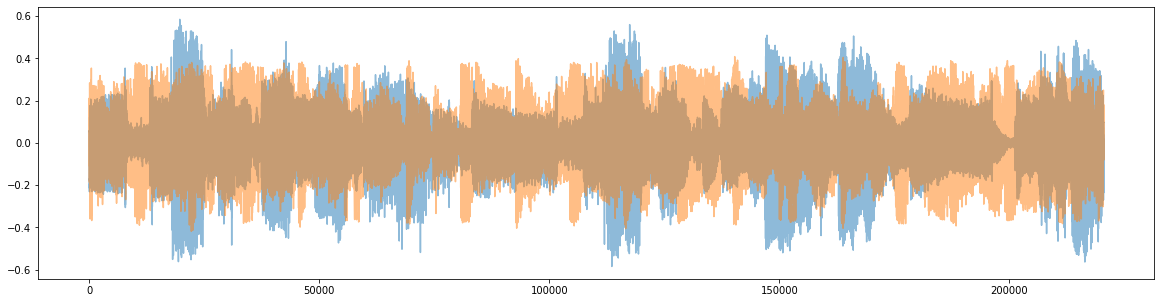

In [30]:
slot_size = 10

track1 = t1[len(t1)//2:(len(t1)//2)+slot_size*fs1]
track2 = t2[len(t2)//2:(len(t2)//2)+slot_size*fs2]

sf.write('track1.wav', track1, fs1)
sf.write('track2.wav', track2, fs2)

plt.figure(figsize=(20,5))
plt.plot(track1, alpha=0.5)
plt.plot(track2, alpha=0.5)
plt.show()

In [20]:
Audio('track1.wav')

In [17]:
Audio('track2.wav')

In [114]:
track1 = np.sin(np.linspace(0,1000)*500*2*np.pi)
track2 = np.sin(np.linspace(0,1000)*500*2*np.pi+125)

48


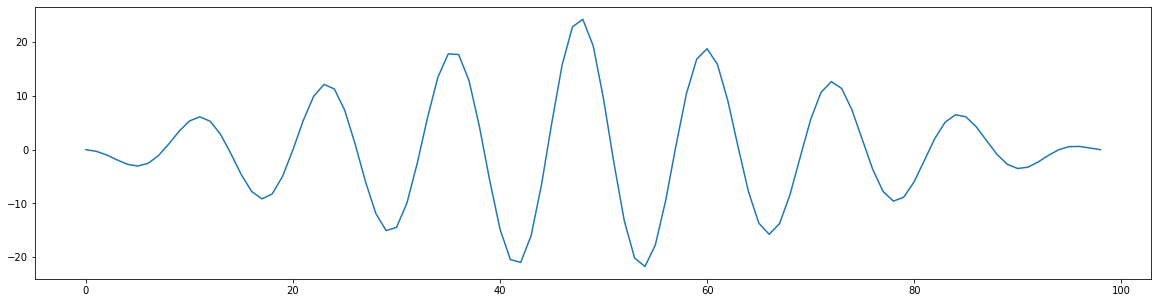

In [115]:
corr = sps.correlate(track1, track2, mode='full')
#corr = corr[len(corr)//2:]
plt.figure(figsize=(20,5))
plt.plot(corr)
sync_lag = np.argmax(corr)
print(sync_lag)

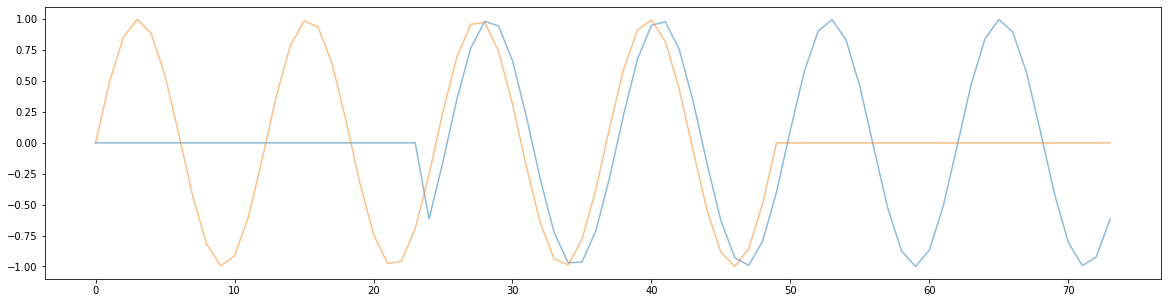

In [116]:
plt.figure(figsize=(20,5))
plt.plot(np.concatenate((np.zeros(sync_lag//2), track2)), alpha=0.5)
plt.plot(np.concatenate((track1, np.zeros(sync_lag//2))), alpha=0.5)
plt.show()

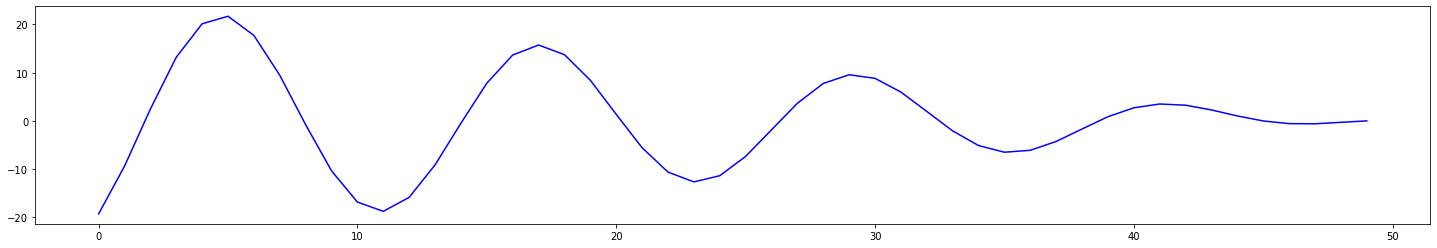

In [117]:
N = len(track1)
x_corr = np.correlate(track1, -track2, 'full')
plt.figure(figsize=(25,4))
taps = np.arange(0, x_corr.shape[0], 1) - N + 1
plt.plot(x_corr[taps >= 0], color='blue')

In [119]:
np.argmax(x_corr)-N

4